# Predicting NHL player salaries based on player stats

In this notebook, we take cleaned 2021-2022 NHL player performance metrics and salary data and attempt to use machine learning to predict the player's salary

Notebook will first test a series of sklearn linear regression model, and then move on to attempted to get a minimal mean square loss function attempting different neural network structures and activation functions, ultimately end with the best empirically found model (in terms of mean square error)

In [1]:
# imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Data load
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])


In [3]:
data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)


In [4]:
# Create our features

y = data_df["Salary"]



In [5]:
# Create our target
X = data_df.drop(columns=['Salary'])

In [6]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
#Load and create the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
# Scale the training and testing data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [8]:
#reshape into arrays for fitting dimensions
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)

In [9]:
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)

In [10]:
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)

In [11]:
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [12]:
## Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.3029323317121535.
The mean squared error is 0.6877988194430227.
The root mean squared error is 0.8293363729169382.
The standard deviation is 1.0.


In [13]:
## Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.3829796570958034.
The mean squared error is 0.6088158764617813.
The root mean squared error is 0.7802665419340888.


In [14]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is -0.12348037502513542.
The mean squared error is 1.1085415530857798.
The root mean squared error is 1.052872999504584.


In [15]:
## HuberRegressor (factors in outliers)
from sklearn.linear_model import HuberRegressor, LinearRegression
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.3015453753441205.
The mean squared error is 0.6891673335714934.
The root mean squared error is 0.830161028699549.


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Conclusions for linear regression machine learning models

Of the different sklearn models, the lasso solver gave the lowest mean square error value, though all the models were not too different in results. These models are lighter to run computationally and do not present the difficulty to calculate results, at the trade off of higher errors.

Neural networks were trained using a GTX 3070 Ti and NVDIA's cuda architecture 

In [16]:
## data must be very non linear, use tensorflow and keras

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [17]:
tf.random.set_seed(420)

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 508215782995506249
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5731516416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1347590402528422256
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [19]:
X.shape

(769, 60)

In [20]:
number_inputs = 60
number_hidden_nodes = 1000

In [21]:
#Create initial neural network
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn.add(Dense(1, activation="tanh"))

In [22]:
# Compile model
nn.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

In [23]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              61000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 62,001
Trainable params: 62,001
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fit the model
nn_model = nn.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 2ms/step - loss: 0.9781 - mean_squared_error: 0.9781
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7479 - mean_squared_error: 0.7479
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6733 - mean_squared_error: 0.6733
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7132 - mean_squared_error: 0.7132
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8109 - mean_squared_error: 0.8109
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7779 - mean_squared_error: 0.7779
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6965 - mean_squared_error: 0.6965
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6464 - mean_squared_error: 0.6464
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6233 - mean_squared_error: 0.6233
Epoch 10/1

In [25]:
y_pred = nn.predict(X)
y_pred_salary = y_scaler.inverse_transform(y_pred)

In [26]:
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.8767 - mean_squared_error: 0.8767 - 90ms/epoch - 13ms/step
Normal Neural Network - Loss: 0.8767461180686951, Accuracy: 0.8767461180686951



Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

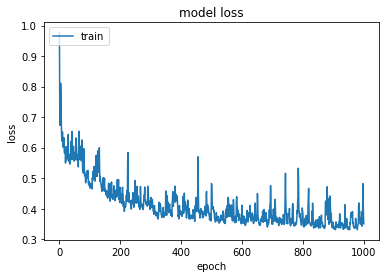

In [27]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanH_FullFeatures800Neurons.png')

In [28]:
y_pred = nn.predict(X)
data_df_initial["Y Scaled"] = y
data_df_initial["Y Pred"]= y_pred
data_df_initial["Predicted Salary"]= y_pred_salary
df_review = data_df_initial
df_review=df_review.sort_values("Y Pred")

In [29]:
#Extract feature importance data

from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

[]

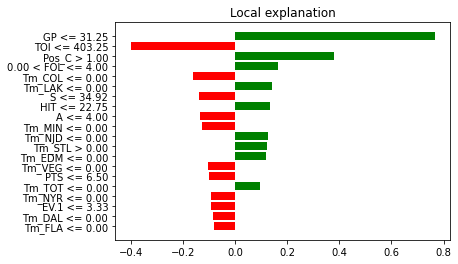

In [30]:
exp = explainer.explain_instance(X[15], nn.predict,
        num_features=20)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.plot()

In [31]:
features = []
features = exp.as_list()

In [32]:
features[42:]

[]

In [33]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']

In [34]:
## Rerunning neural networks after droping the 18 least influencial features in order to determine if loss function improves



In [35]:
#Drop list of features
drop_list = ['S%','Tm_WPG','Tm_MTL','SH','Age','Tm_TOT','PS','Tm_PHI','Tm_OTT','Tm_PIT','Tm_ANA','GW','S','Pos_RW','Tm_CAR','EV','Tm_MIN','Pos_LW']

In [36]:
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])
data_df = data_df.drop(columns=drop_list)
data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)
y = data_df["Salary"]

X = data_df.drop(columns=['Salary'])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [38]:
X.shape

(769, 42)

In [39]:
number_inputs = 42
number_hidden_nodes = 800

In [40]:
nn2 = Sequential()
nn2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn2.add(Dense(1, activation="tanh"))

# Compile model
nn2.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 800)               34400     
                                                                 
 dense_3 (Dense)             (None, 1)                 801       
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fit the model
nn2_model = nn2.fit(X_train, y_train, epochs=1500)

Epoch 1/1500
18/18 [==============================] - 0s 2ms/step - loss: 1.0202 - mean_squared_error: 1.0202
Epoch 2/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7622 - mean_squared_error: 0.7622
Epoch 3/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6825 - mean_squared_error: 0.6825
Epoch 4/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6580 - mean_squared_error: 0.6580
Epoch 5/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6428 - mean_squared_error: 0.6428
Epoch 6/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.7041 - mean_squared_error: 0.7041
Epoch 7/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6746 - mean_squared_error: 0.6746
Epoch 8/1500
18/18 [==============================] - 0s 2ms/step - loss: 0.6472 - mean_squared_error: 0.6472
Epoch 9/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6417 - mean_squared_error: 0.6417
Epoch 10/1

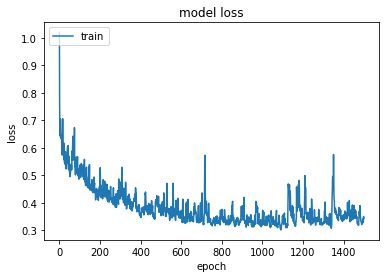

In [42]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn2_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanH_ReducedFeatures800Neurons.png')

In [50]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']
df_review = df_review.sort_values('Delta')

Epoch 1/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.2839 - mean_squared_error: 1.2839
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.8129 - mean_squared_error: 0.8129
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6849 - mean_squared_error: 0.6849
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6929 - mean_squared_error: 0.6929
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6914 - mean_squared_error: 0.6914
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7309 - mean_squared_error: 0.7309
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6865 - mean_squared_error: 0.6865
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6245 - mean_squared_error: 0.6245
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6666 - mean_squared_error: 0.6666
Epoch 10/1

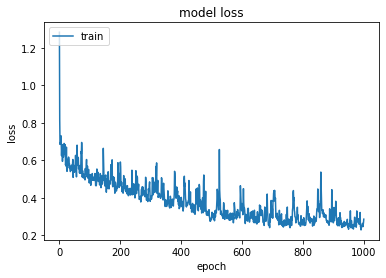

In [51]:
#Testing neural networks to see if greater accuracy could be acheived 

number_inputs = 42
number_hidden_nodes = 500

nn4 = Sequential()
nn4.add(Dense(units=900, input_dim=number_inputs, activation="tanh"))
nn4.add(Dense(1, activation="elu"))

# Compile model
nn4.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn4_model = nn4.fit(X_train, y_train, epochs=1000)

import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn4_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkTanHElu_ReducedFeatures900Neurons.png')

Epoch 1/1400
18/18 [==============================] - 0s 1ms/step - loss: 1.7168 - mean_squared_error: 1.7168
Epoch 2/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.9686 - mean_squared_error: 0.9686
Epoch 3/1400
18/18 [==============================] - 0s 1ms/step - loss: 0.8107 - mean_squared_error: 0.8107
Epoch 4/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7599 - mean_squared_error: 0.7599
Epoch 5/1400
18/18 [==============================] - 0s 1ms/step - loss: 0.7337 - mean_squared_error: 0.7337
Epoch 6/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7506 - mean_squared_error: 0.7506
Epoch 7/1400
18/18 [==============================] - 0s 2ms/step - loss: 0.7097 - mean_squared_error: 0.7097
Epoch 8/1400
18/18 [==============================] - 0s 1ms/step - loss: 0.6908 - mean_squared_error: 0.6908
Epoch 9/1400
18/18 [==============================] - 0s 1ms/step - loss: 0.6830 - mean_squared_error: 0.6830
Epoch 10/1

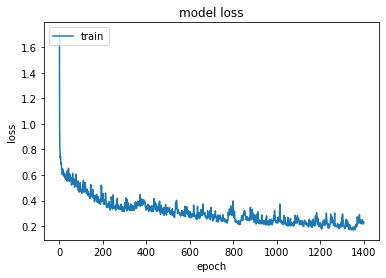

In [52]:
#Testing neural networks to see if greater accuracy could be acheived 

nn5 = Sequential()
nn5.add(Dense(units=300, input_dim=number_inputs, activation="tanh"))
nn5.add(Dense(1, activation="elu"))

# Compile model
nn5.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

nn5_model = nn5.fit(X_train, y_train, epochs=1400)

import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn5_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkEluTanh_ReducedFeatures300Neurons.png')

In [ ]:
plt.plot(nn5_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.legend(['train', 'test'], loc='upper left')
plt.show()
ax.figure.savefig('NeuralNetworkEluTanh_ReducedFeatures.png')


# Conclusions

We trained a variety of neural network models attempting to minimize the loss function. We varied the number of neurons and layers, and tested different activation functions (Tanh,Elu, Selu, Relu, Sigmoid, Softmax).

Findings:
- Additional layers and neurons will not necessarily lead to better loss functions. Increasing number of neurons will initially decrease the loss function, before pushing it up. Best approach is a balanced approach. Our best model had a 7.1 neurons per input feature
- Of the activation functions, only Sigmoid, Tanh and Elu gave decreasing loss functions with values < 1
- In terms of improving activation functions, performance went Sigmoid -> TanH -> Elu
- Through testing we noticed Elu worked best as the activation function of the output layer, and Tanh for the one hidden layer we are using